In [1]:
import torch
import torchvision
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

### GPU Selection

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Configure Path

In [3]:
PATH_TO_DATASET = "/home/mirap/0_DATABASE/1_sperm_acrosome_reaction/2_AR_1000/voc/"

In [4]:
# If you want to adjust num_workers, then check avaliable CPU cores.
# setting num_workers to the maximum number of available CPUs is not always the best approach, 
# as it may result in degraded performance due to overhead and contention for resources.
import psutil

cpu_count = psutil.cpu_count()
cpu_percent = psutil.cpu_percent()

cpu_available = cpu_count - int(cpu_count * (cpu_percent/100))
print("Max num_workers for this system: ", cpu_count)
print("Number of available CPU cores:", cpu_available)

Max num_workers for this system:  96
Number of available CPU cores: 91


In [23]:
# Define the transformations to apply to the images
# transform = torchvision.transforms.ToTensor()

# Load the Pascal VOC dataset
voc_dataset = torchvision.datasets.VOCDetection(PATH_TO_DATASET, 
                                                  year='2008', 
                                                  image_set='trainval', 
                                                  download=False, 
                                                  transform=None,
                                                  target_transform=None)

# Get an example image and annotation from the dataset
image, target = voc_dataset[0]

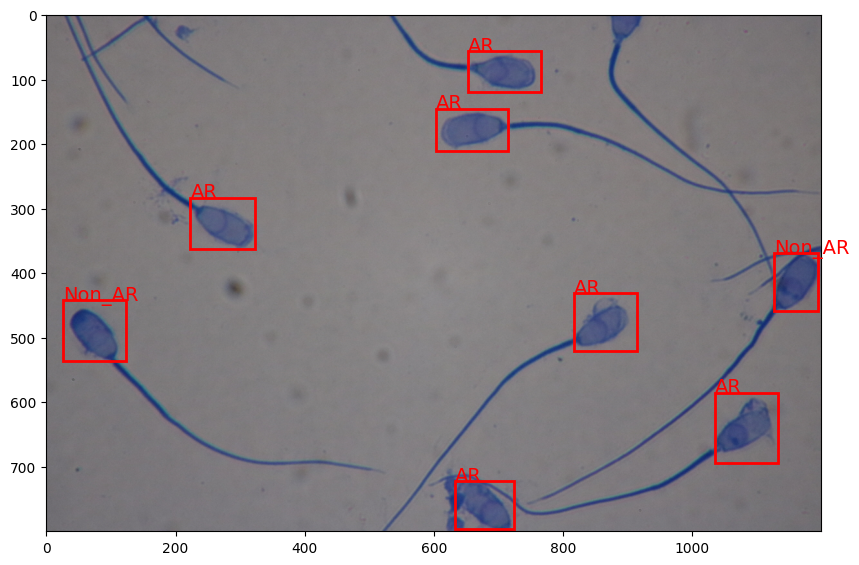

In [24]:
# Convert the image from a PyTorch tensor to a NumPy array
image = np.array(image)

# Plot the image and target
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

# Loop through each object in the target and plot its bounding box and label
for obj in target['annotation']['object']:
    # Get the class label for the object
    cls = obj['name']
    
    # Get the bounding box coordinates for the object
    xmin = int(obj['bndbox']['xmin'])
    ymin = int(obj['bndbox']['ymin'])
    xmax = int(obj['bndbox']['xmax'])
    ymax = int(obj['bndbox']['ymax'])
    
    # Draw the bounding box and label on the image
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                fill=False, edgecolor='red', linewidth=2))
    ax.text(xmin, ymin, f'{cls}', fontsize=14, color='red')
    
# Show the image and target
plt.show()


In [25]:
data_loader = torch.utils.data.DataLoader(voc_dataset,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=4)